# **Clasificación de una variable para determinar si el pedido fue preciso**

# **Introducción**

Este proyecto emplea los datos de una encuesta de satisfacción del cliente para productos alimenticios. Los datos incluyen variables como la satisfacción general del cliente, la calidad del servicio y del producto, entre otras. La variable dependiente es la precisión del pedido, la cual se quiere clasificar en dos posibles calificaciones: pedido preciso o no.

# **Objetivos**

* Llevar a cabo el método de clasificación para una variable y así determinar si el pedido fue preciso o no.
* Realizar el preprocesamiento de datos para luego aplicar los modelos de clasificación, como la regresión logística, los bosques aleatorios, la máquina de soporte de vectores y los árboles de decisión.

In [31]:

import matplotlib.gridspec as gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import scipy.stats
import seaborn as sns
import sklearn.metrics
import missingno as msno


## Visualización de los datos con pandas:

In [18]:
df = pd.read_csv("satisfacion_cliente.csv", encoding="ISO-8859-1")
pd.set_option('display.max_columns', None)
print(df.tail())
pd.set_option('display.max_rows', None)

       Customer  \
10611     10612   
10612     10613   
10613     10614   
10614     10615   
10615     10616   

       How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
10611                                                4.0                                                                                                          
10612                                                3.0                                                                                                          
10613                                                5.0                                                                                                          
10614                                                3.0                                                                                                          
10615                                                1.0              

## Tamaño del conjunto de datos:

In [19]:
df.shape

(10616, 5)

## Tipos de datos en cada variable:

In [20]:
df.dtypes

Customer                                                                                                                                                        int64
How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied      float64
How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied     float64
How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied    float64
Was your order accurate? Please respond yes or no.                                                                                                             object
dtype: object

## Renombrar variables:

In [21]:
# Renombramos las variables

rempl = [("How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied", "satisfaccion_general"), 
         ("How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied", "calidad"), 
         ("How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied", "rapidez_entrega"), 
         ("Was your order accurate? Please respond yes or no.", "pedido_preciso")]

# Creamos una copia del dataset
df_1 = df.copy()

# Renombramos las variables en la copia
for old, new in rempl:
    df_1.rename(columns={old: new}, inplace=True)

# Imprimimos el dataset
print(df_1.head())

   Customer  satisfaccion_general  calidad  rapidez_entrega pedido_preciso
0         1                   5.0      3.0              4.0            Yes
1         2                   3.0      4.0              3.0            Yes
2         3                   4.0      5.0              2.0            Yes
3         4                   5.0      3.0              4.0            Yes
4         5                   2.0      5.0              1.0            Yes


## Determinación de valores nulos: 

In [98]:
# valores nulos

(
    df_1
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

pedido_preciso          660
satisfaccion_general    418
calidad                 252
rapidez_entrega         239
Customer                  0
dtype: int64

## Formato de los datos en cada variable:

In [23]:
df_1.dtypes

Customer                  int64
satisfaccion_general    float64
calidad                 float64
rapidez_entrega         float64
pedido_preciso           object
dtype: object

## Visualización de la distribución de densidad para las variables de satisfaccion general y calidad:

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

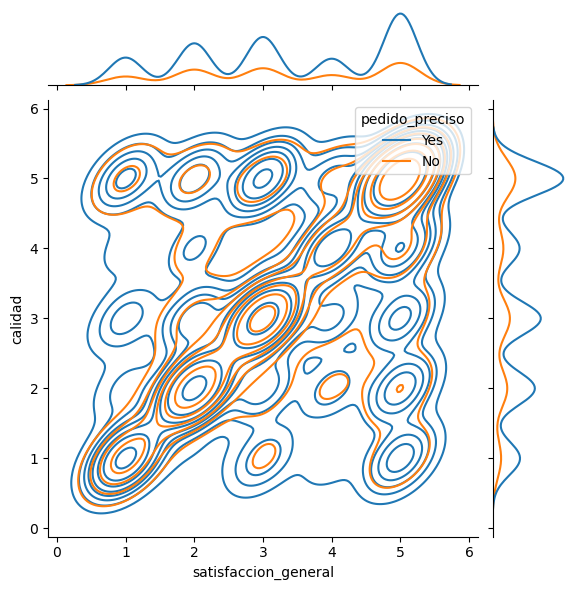

In [24]:
# Graficar el joinplot 
sns.jointplot(data=df_1, x='satisfaccion_general', y='calidad', hue='pedido_preciso', kind='kde')



## Visualización de la distribución de densidad para las variables de satisfaccion general y rapidez de entrega:

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

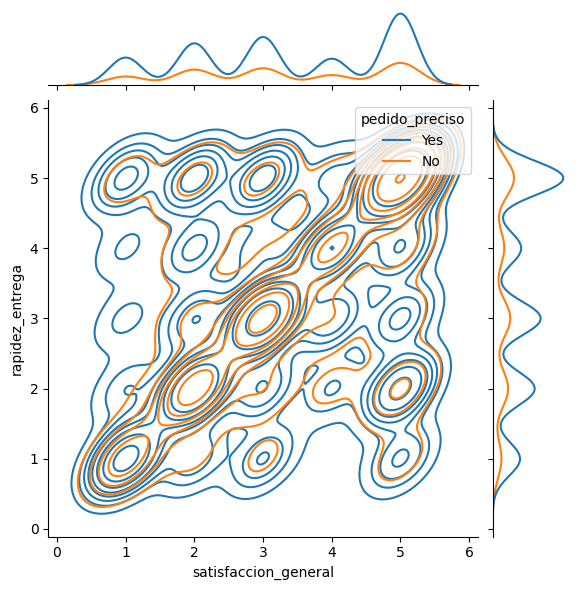

In [25]:
# Graficar el joinplot 
sns.jointplot(data=df_1, x='satisfaccion_general', y='rapidez_entrega', hue='pedido_preciso', kind='kde')

## Eliminacion de la variable Customer de df_1:

In [26]:
# eliminar Customer dr df_1

df_2 = df_1.drop(["Customer"], axis=1)

## Formato de las variables del dataframe:

In [27]:
df_2.dtypes

satisfaccion_general    float64
calidad                 float64
rapidez_entrega         float64
pedido_preciso           object
dtype: object

## Conversión de booleano a entero para la variable pedido preciso:

In [28]:
# convertir de boleano a entero

# Convertir los datos de tipo carácter a tipo entero
df_2["pedido_preciso"] = df_2["pedido_preciso"].replace("Yes", 1)
df_2["pedido_preciso"] = df_2["pedido_preciso"].replace("No", 0)

# Visualizar el dataframe
print(df_2)

       satisfaccion_general  calidad  rapidez_entrega  pedido_preciso
0                       5.0      3.0              4.0             1.0
1                       3.0      4.0              3.0             1.0
2                       4.0      5.0              2.0             1.0
3                       5.0      3.0              4.0             1.0
4                       2.0      5.0              1.0             1.0
5                       5.0      2.0              5.0             1.0
6                       1.0      4.0              3.0             1.0
7                       3.0      3.0              2.0             0.0
8                       5.0      1.0              3.0             1.0
9                       3.0      5.0              3.0             0.0
10                      5.0      3.0              4.0             1.0
11                      2.0      2.0              5.0             1.0
12                      4.0      5.0              3.0             0.0
13                  

## Imputación de valores nulos con el método knn de valores cercanos:

<Axes: >

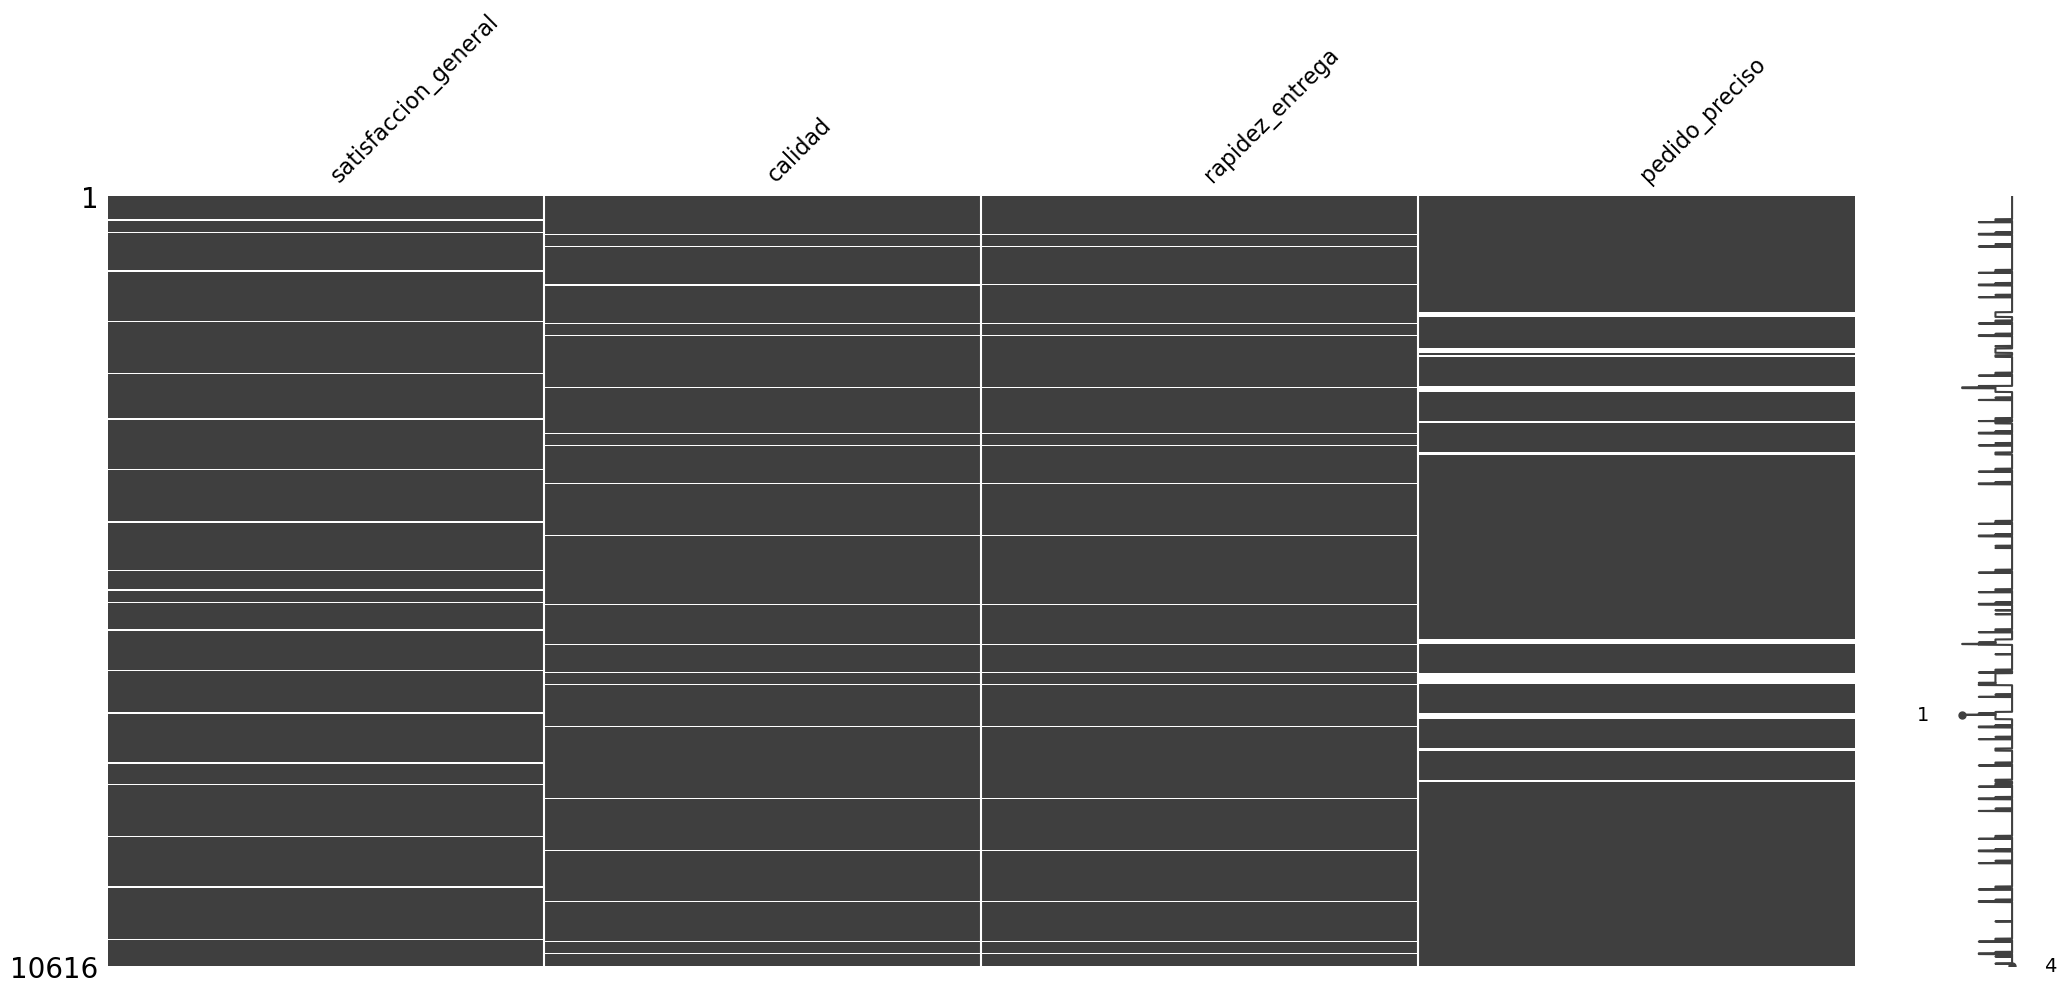

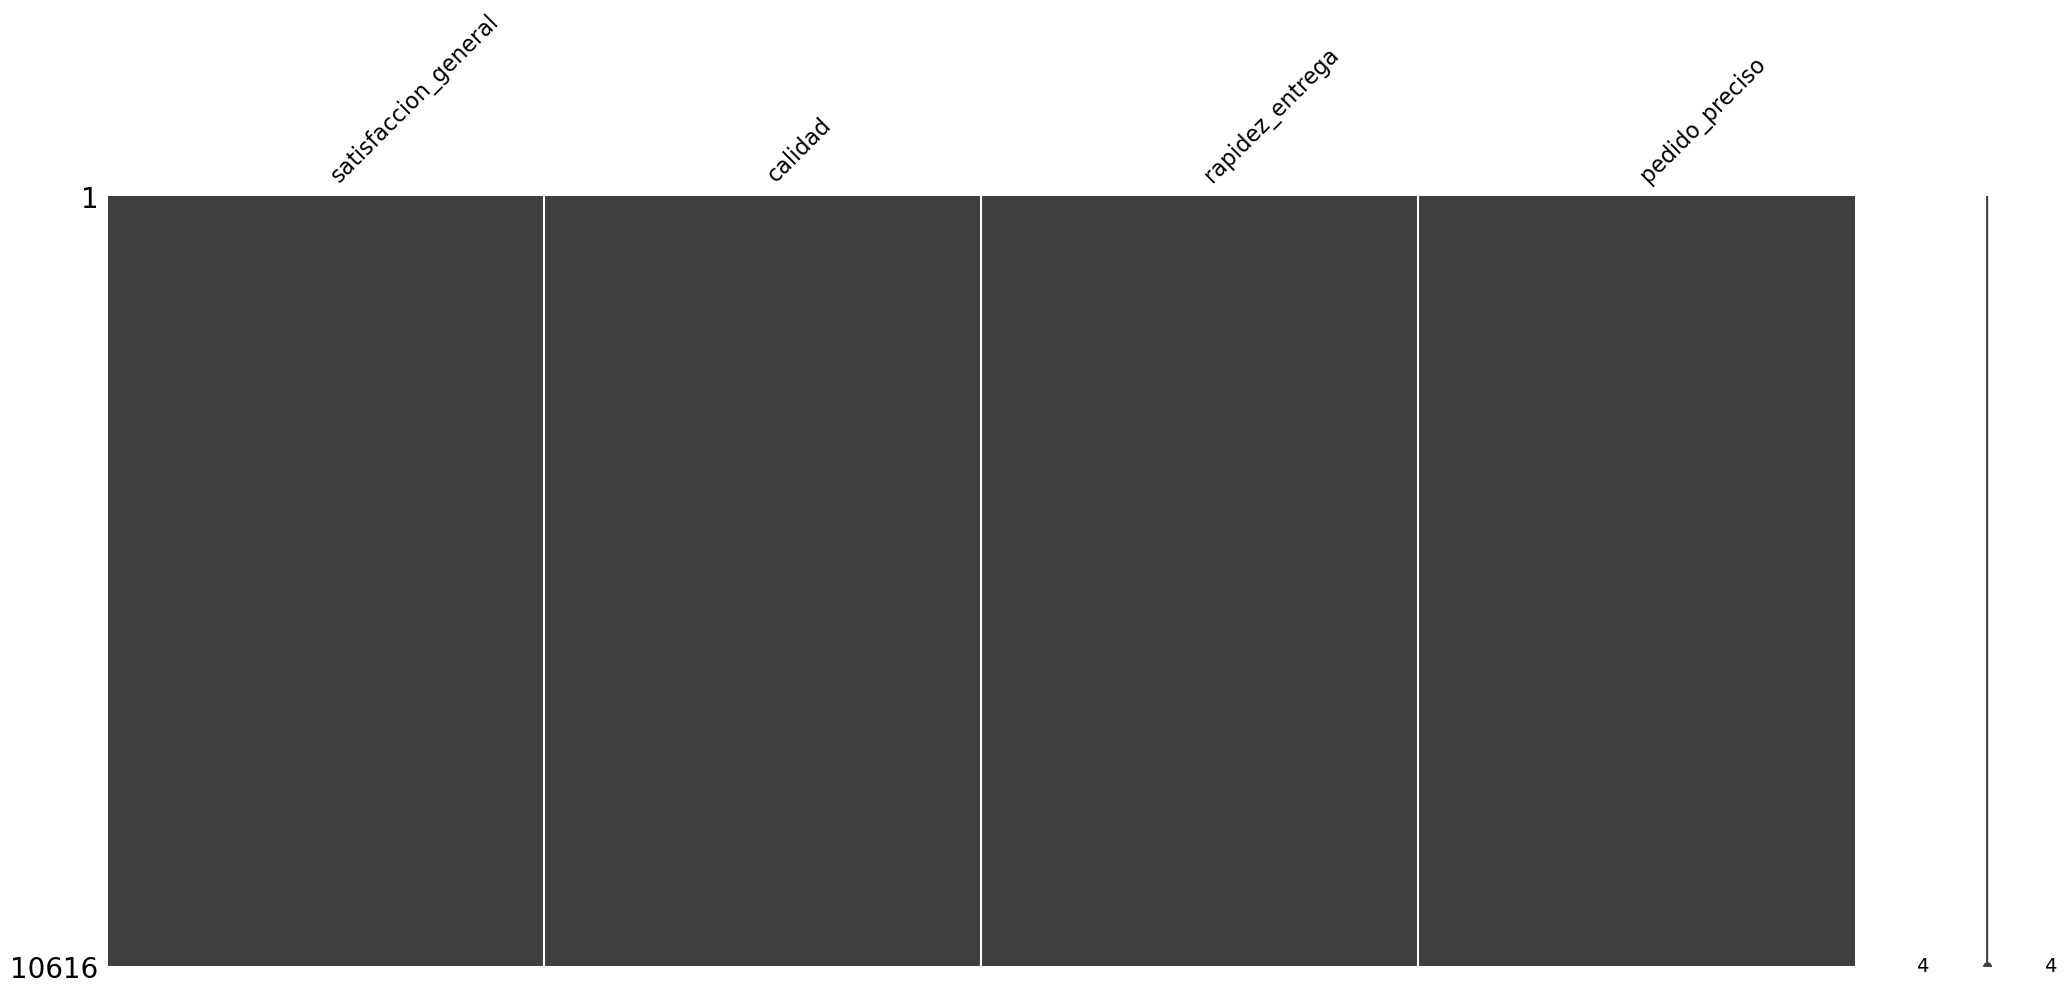

In [32]:

# imputacion nulos knn

# Importar la clase KNNImputer
from sklearn.impute import KNNImputer


# Visualizar los valores faltantes
msno.matrix(df_2)

# Imputar los valores faltantes con KNN, se recomienda entre 5 y 15 vecinos
imputer = KNNImputer(n_neighbors=20, metric='nan_euclidean') # número de vecinos que se utilizarán para predecir los valores faltantes con distancia nan_euclidean para ser menos sensible a atipicos
df_imputed = imputer.fit_transform(df_2)# para imputar los valores faltantes en el dataframe 

# Construir el nuevo dataframe imputado
df_imputed = pd.DataFrame(df_imputed, columns=df_2.columns)# El dataframe df_imputed tiene las mismas columnas que el dataframe original

# Visualizar los valores faltantes después de la imputación
msno.matrix(df_imputed)



In [33]:
print(df_imputed)

       satisfaccion_general  calidad  rapidez_entrega  pedido_preciso
0                      5.00     3.00             4.00            1.00
1                      3.00     4.00             3.00            1.00
2                      4.00     5.00             2.00            1.00
3                      5.00     3.00             4.00            1.00
4                      2.00     5.00             1.00            1.00
5                      5.00     2.00             5.00            1.00
6                      1.00     4.00             3.00            1.00
7                      3.00     3.00             2.00            0.00
8                      5.00     1.00             3.00            1.00
9                      3.00     5.00             3.00            0.00
10                     5.00     3.00             4.00            1.00
11                     2.00     2.00             5.00            1.00
12                     4.00     5.00             3.00            0.00
13                  

## Determinación de valores nulos:

In [34]:
# valores nulos

(
    df_imputed
    .isnull()
    .sum()
    .sort_values(ascending=False)
)

satisfaccion_general    0
calidad                 0
rapidez_entrega         0
pedido_preciso          0
dtype: int64

## Tamaño del dataframe:

In [35]:
df_imputed.shape

(10616, 4)

## Valores atipicos:

In [36]:
# valores atipicos
q1 = df_imputed.quantile(0.25)
q3 = df_imputed.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound)
print(upper_bound)

satisfaccion_general   -2.5
calidad                -2.5
rapidez_entrega        -2.5
pedido_preciso         -1.5
dtype: float64
satisfaccion_general    9.5
calidad                 9.5
rapidez_entrega         9.5
pedido_preciso          2.5
dtype: float64


## Valores atípicos para las variables de interés:

<Axes: xlabel='satisfaccion_general'>

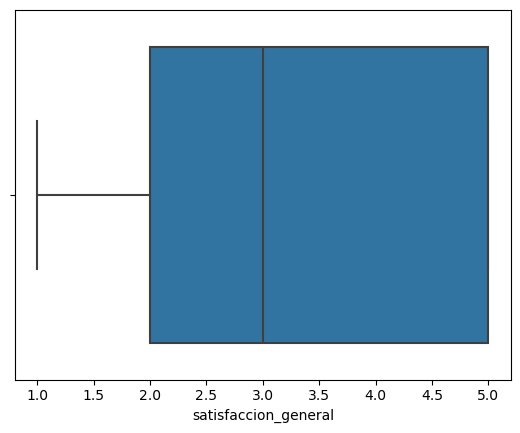

In [44]:
 # valores atipicos satisfaccion_general
    
    
sns.boxplot(data=df_imputed, x="satisfaccion_general", palette="tab10")

<Axes: xlabel='calidad'>

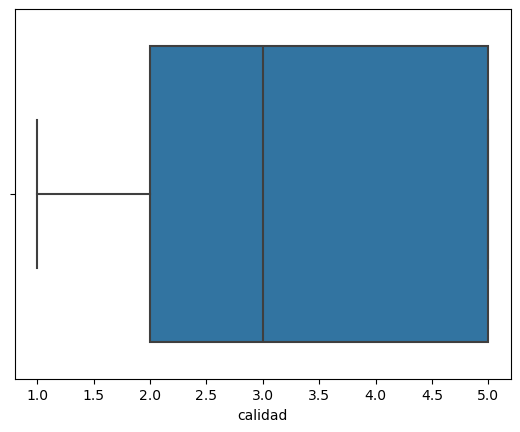

In [45]:
 # valores atipicos calidad
    
    
sns.boxplot(data=df_imputed, x="calidad", palette="tab10")

<Axes: xlabel='rapidez_entrega'>

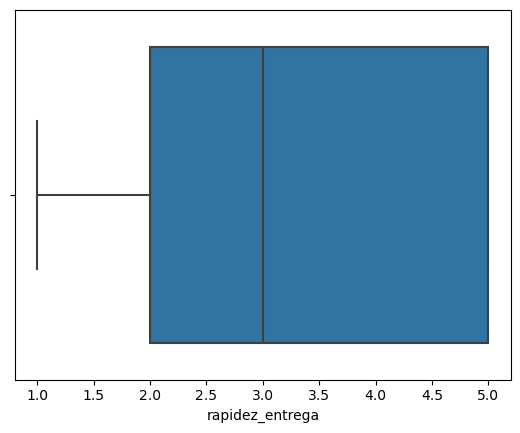

In [46]:
 # valores atipicos rapidez_entrega
    
   
sns.boxplot(data=df_imputed, x="rapidez_entrega", palette="tab10")

<Axes: xlabel='pedido_preciso'>

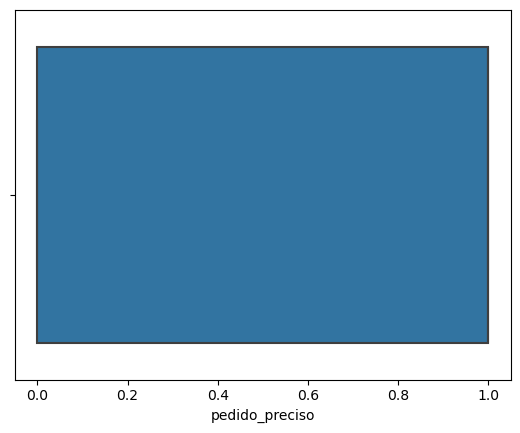

In [47]:
 # valores atipicos pedido_preciso 
    
    
sns.boxplot(data=df_imputed, x="pedido_preciso", palette="tab10")

## Verificación de errores de entrada:
* Confirmo que todas las variables son de tipo numérico

In [48]:
# se verifican errores de entrada si los datos no son flot



# Verifica si los valores de las columnas "Sales" y "Profit" son float64
def is_float64(column):
    return column.dtype == float

for col in ["satisfaccion_general", "calidad", "rapidez_entrega", "pedido_preciso"]:
    if not is_float64(df_imputed[col]):
        # Si no son float64, imprime el error
        print(f"Error: La columna {col} no es float64")
    else:
        print("son float")

son float
son float
son float
son float


## Se observa que no existe indicios de correlación fuerte con la variable de pedido preciso:

In [49]:
# correlaciones 

df_imputed.corr()

satisfaccion_general   calidad  rapidez_entrega  \
satisfaccion_general              1.000000  0.457329         0.464683   
calidad                           0.457329  1.000000         0.705445   
rapidez_entrega                   0.464683  0.705445         1.000000   
pedido_preciso                    0.015718 -0.004487         0.013363   

                      pedido_preciso  
satisfaccion_general        0.015718  
calidad                    -0.004487  
rapidez_entrega             0.013363  
pedido_preciso              1.000000

## Matriz de correlaciones:

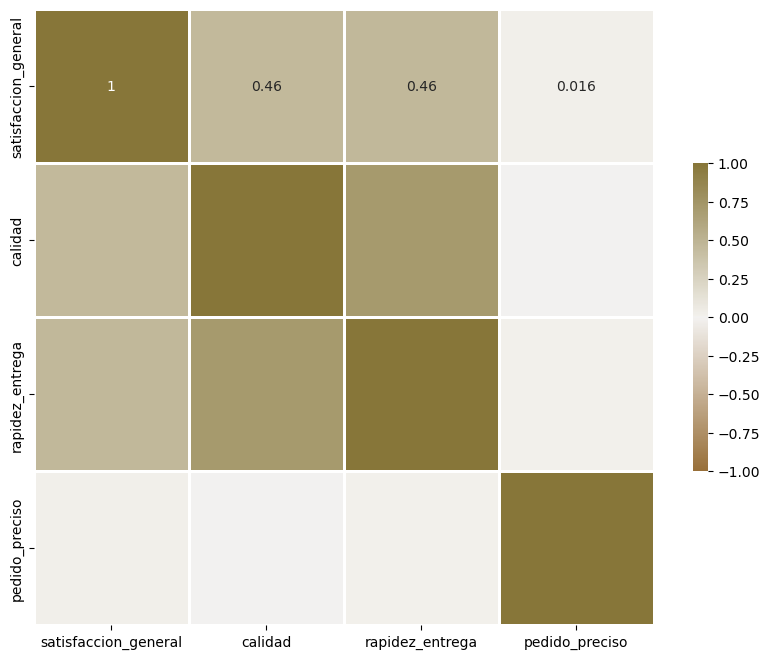

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define el tamaño de la figura
plt.figure(figsize=(10, 8)) 

# Plotea la matriz
sns.heatmap(data=df_imputed.corr(),
            cmap=sns.diverging_palette(50, 430, as_cmap=True),
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.8,
            cbar_kws={"shrink": 0.5},
            annot=True)

# Muestra el gráfico
plt.show()

## Selección de la variable Satisfacción general:

In [51]:
# Seleccionamos la variable SATISFACCION_GENERAL
raw_0 = df_imputed.iloc[:, 0]

In [52]:
print(raw_0)

0        5.00
1        3.00
2        4.00
3        5.00
4        2.00
5        5.00
6        1.00
7        3.00
8        5.00
9        3.00
10       5.00
11       2.00
12       4.00
13       3.00
14       1.00
15       5.00
16       2.00
17       4.00
18       5.00
19       2.00
20       5.00
21       3.00
22       1.00
23       5.00
24       3.00
25       2.00
26       2.00
27       4.00
28       4.00
29       3.00
30       5.00
31       3.00
32       1.00
33       5.00
34       5.00
35       2.00
36       1.00
37       5.00
38       2.00
39       3.00
40       5.00
41       3.00
42       4.00
43       5.00
44       2.00
45       5.00
46       1.00
47       3.00
48       5.00
49       3.00
50       5.00
51       2.00
52       4.00
53       3.00
54       1.00
55       5.00
56       2.00
57       4.00
58       5.00
59       2.00
60       5.00
61       3.00
62       1.00
63       5.00
64       3.00
65       2.00
66       2.00
67       4.00
68       4.00
69       3.00
70       5.00
71    

## Escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

In [53]:

# Escalamiento max-min
max_raw = max(raw_0)
min_raw = min(raw_0)
scaled_0 = (2*raw_0 - max_raw -min_raw)/(max_raw - min_raw) # para que esten los datos entre -1 y 1

# Normalización Z-score
avg = np.average(raw_0)
std = np.std(raw_0)
z_scaled_0 = (raw_0 - avg)/std

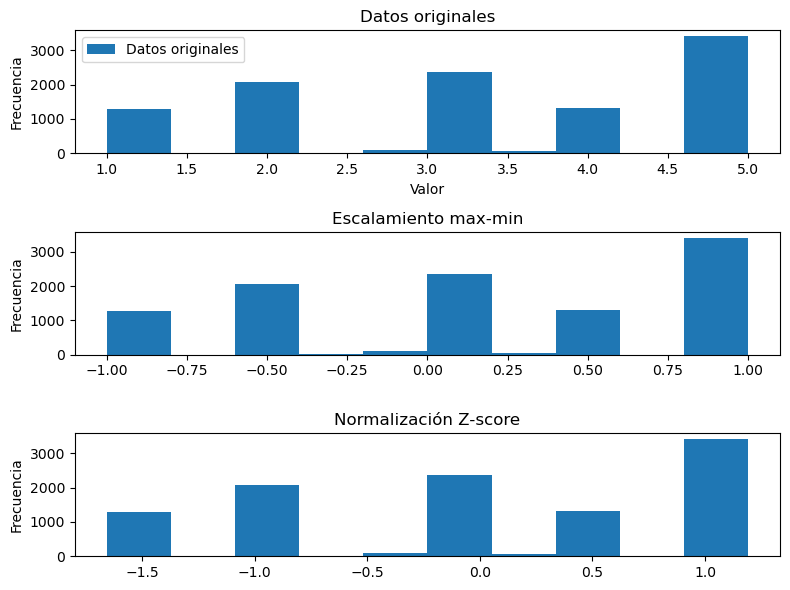

In [54]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_0, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_0, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_0, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Selección de la variable calidad:

In [55]:
# Seleccionamos la variable CALIDAD
raw_1 = df_imputed.iloc[:, 1]

In [56]:
print(raw_1)

0        3.00
1        4.00
2        5.00
3        3.00
4        5.00
5        2.00
6        4.00
7        3.00
8        1.00
9        5.00
10       3.00
11       2.00
12       5.00
13       4.00
14       5.00
15       4.00
16       2.00
17       5.00
18       1.00
19       4.00
20       5.00
21       3.00
22       5.00
23       4.00
24       3.00
25       3.00
26       2.00
27       5.00
28       1.00
29       4.00
30       5.00
31       3.00
32       2.00
33       5.00
34       1.00
35       3.00
36       5.00
37       4.00
38       2.00
39       3.00
40       5.00
41       3.00
42       4.00
43       5.00
44       2.00
45       5.00
46       1.00
47       3.00
48       5.00
49       3.00
50       5.00
51       2.00
52       4.00
53       3.00
54       1.00
55       5.00
56       2.00
57       4.00
58       5.00
59       2.00
60       5.00
61       3.00
62       1.00
63       5.00
64       3.00
65       2.00
66       2.00
67       4.00
68       4.00
69       3.00
70       5.00
71    

## Escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

In [57]:

# Escalamiento max-min
max_raw = max(raw_1)
min_raw = min(raw_1)
scaled_1 = (2*raw_1 - max_raw -min_raw)/(max_raw - min_raw) # para que esten los datos entre -1 y 1

# Normalización Z-score
avg = np.average(raw_1)
std = np.std(raw_1)
z_scaled_1 = (raw_1 - avg)/std

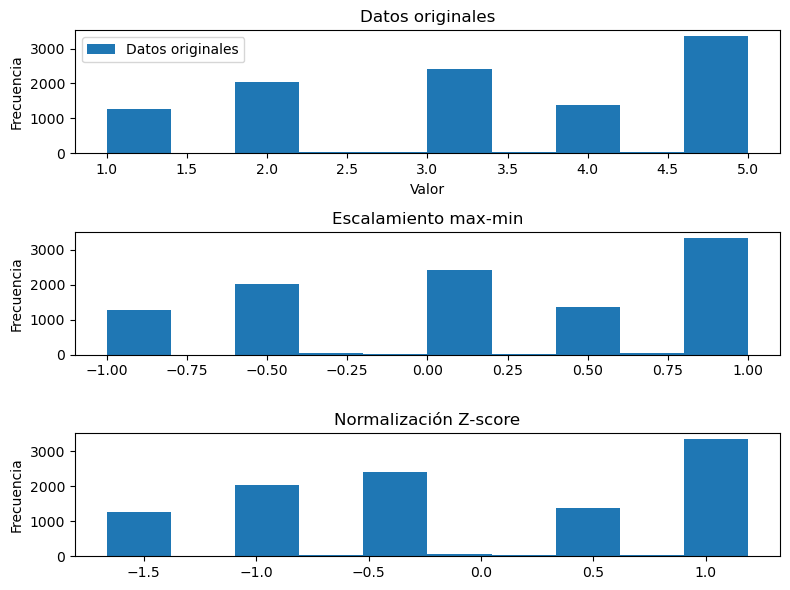

In [58]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_1, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_1, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_1, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Selección de la variable rapidez de entrega:

In [59]:
# Seleccionamos la variable RAPIDEZ DE ENTREGA
raw_2 = df_imputed.iloc[:, 2]

In [60]:
print(raw_2)

0        4.00
1        3.00
2        2.00
3        4.00
4        1.00
5        5.00
6        3.00
7        2.00
8        3.00
9        3.00
10       4.00
11       5.00
12       3.00
13       2.00
14       1.00
15       5.00
16       4.00
17       4.00
18       5.00
19       4.00
20       1.00
21       3.00
22       5.00
23       4.00
24       2.00
25       4.00
26       3.00
27       4.00
28       2.00
29       5.00
30       4.00
31       4.00
32       5.00
33       1.00
34       2.00
35       3.00
36       4.00
37       3.00
38       4.00
39       2.00
40       5.00
41       3.00
42       4.00
43       5.00
44       2.00
45       5.00
46       1.00
47       3.00
48       5.00
49       3.00
50       5.00
51       2.00
52       4.00
53       3.00
54       1.00
55       5.00
56       2.00
57       4.00
58       5.00
59       2.00
60       5.00
61       3.00
62       1.00
63       5.00
64       3.00
65       2.00
66       2.00
67       4.00
68       4.00
69       3.00
70       5.00
71    

## Escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

In [61]:
# Añadimos la variable al dataframe
#df = df.assign(raw=raw)

# Escalamiento max-min
max_raw = max(raw_2)
min_raw = min(raw_2)
scaled_2 = (2*raw_2 - max_raw -min_raw)/(max_raw - min_raw) 

# Normalización Z-score
avg = np.average(raw_2)
std = np.std(raw_2)
z_scaled_2 = (raw_2 - avg)/std

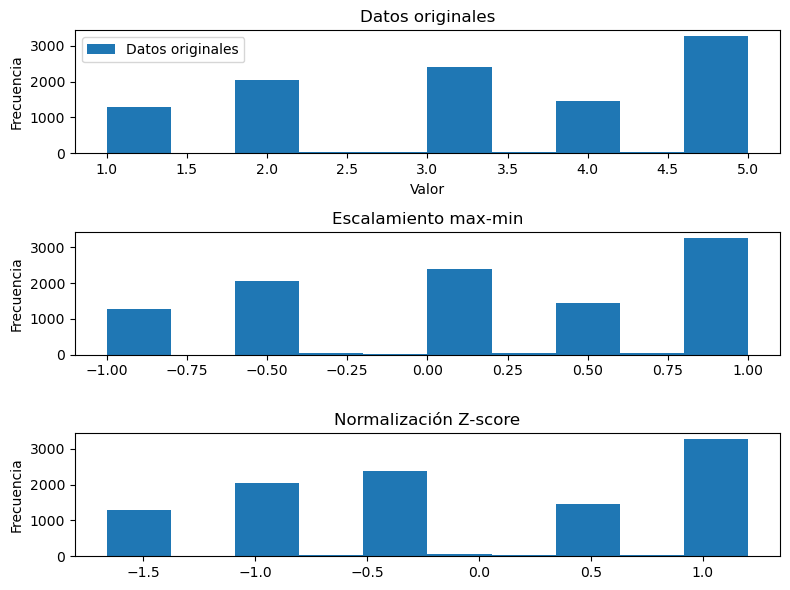

In [62]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_2, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_2, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_2, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Selección de la variable pedido preciso:

In [63]:
# Seleccionamos la variable PEDIDO PRECISO
raw_3 = df_imputed.iloc[:, 3]

In [64]:
print(raw_3)

0        1.00
1        1.00
2        1.00
3        1.00
4        1.00
5        1.00
6        1.00
7        0.00
8        1.00
9        0.00
10       1.00
11       1.00
12       0.00
13       1.00
14       1.00
15       1.00
16       1.00
17       0.00
18       1.00
19       1.00
20       1.00
21       0.00
22       1.00
23       1.00
24       1.00
25       1.00
26       0.00
27       1.00
28       1.00
29       1.00
30       1.00
31       0.00
32       1.00
33       1.00
34       1.00
35       1.00
36       1.00
37       1.00
38       0.00
39       1.00
40       1.00
41       1.00
42       1.00
43       1.00
44       1.00
45       1.00
46       1.00
47       0.00
48       1.00
49       0.00
50       1.00
51       1.00
52       0.00
53       1.00
54       1.00
55       1.00
56       1.00
57       0.00
58       1.00
59       1.00
60       1.00
61       0.00
62       1.00
63       1.00
64       1.00
65       1.00
66       0.00
67       1.00
68       1.00
69       1.00
70       1.00
71    

## Escalamiento min-max, normalización y visualización  para comparar los datos sin normalizar ni escalar con los datos normalizados y escalados:

In [65]:

# Escalamiento max-min
max_raw = max(raw_3)
min_raw = min(raw_3)
scaled_3 = (2*raw_3 - max_raw -min_raw)/(max_raw - min_raw) 

# Normalización Z-score
avg = np.average(raw_3)
std = np.std(raw_3)
z_scaled_3 = (raw_3 - avg)/std

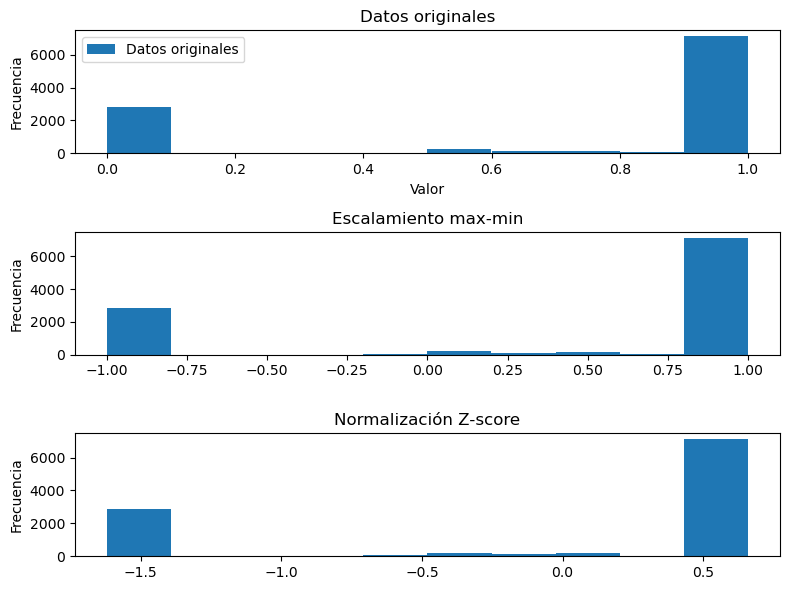

In [66]:
# Histogramas
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(3, 1)

# Gráfico 1
ax1 = fig.add_subplot(gs[0])
ax1.hist(raw_3, label="Datos originales")
ax1.set_title("Datos originales")
ax1.set_ylabel("Frecuencia")

# Gráfico 2
ax2 = fig.add_subplot(gs[1])
ax2.hist(scaled_3, label="Escalamiento max-min")
ax2.set_title("Escalamiento max-min")
ax2.set_ylabel("Frecuencia")

# Gráfico 3
ax3 = fig.add_subplot(gs[2])
ax3.hist(z_scaled_3, label="Normalización Z-score")
ax3.set_title("Normalización Z-score")
ax3.set_ylabel("Frecuencia")

ax1.set_xlabel("Valor")
ax1.legend()

plt.tight_layout()
plt.show()

## Método PCA:

In [67]:
# inicio del metodo pca

# Obtiene las variables numericas
df_pca =df_imputed[['satisfaccion_general', 'calidad', 'rapidez_entrega', 'pedido_preciso']]

# Imprime las variables numericas
print(df_pca)

       satisfaccion_general  calidad  rapidez_entrega  pedido_preciso
0                      5.00     3.00             4.00            1.00
1                      3.00     4.00             3.00            1.00
2                      4.00     5.00             2.00            1.00
3                      5.00     3.00             4.00            1.00
4                      2.00     5.00             1.00            1.00
5                      5.00     2.00             5.00            1.00
6                      1.00     4.00             3.00            1.00
7                      3.00     3.00             2.00            0.00
8                      5.00     1.00             3.00            1.00
9                      3.00     5.00             3.00            0.00
10                     5.00     3.00             4.00            1.00
11                     2.00     2.00             5.00            1.00
12                     4.00     5.00             3.00            0.00
13                  

## Matriz de correlaciones:
* se observa correlaciones debiles con la variable pedido preciso

In [68]:
df_pca.corr()


satisfaccion_general   calidad  rapidez_entrega  \
satisfaccion_general              1.000000  0.457329         0.464683   
calidad                           0.457329  1.000000         0.705445   
rapidez_entrega                   0.464683  0.705445         1.000000   
pedido_preciso                    0.015718 -0.004487         0.013363   

                      pedido_preciso  
satisfaccion_general        0.015718  
calidad                    -0.004487  
rapidez_entrega             0.013363  
pedido_preciso              1.000000

## Covarianza:

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(
    df_pca.values
    )

covariance_matrix = np.cov(scaled.T) 
covariance_matrix 


array([[ 1.00009421,  0.457372  ,  0.46472655,  0.01571975],
       [ 0.457372  ,  1.00009421,  0.70551149, -0.00448757],
       [ 0.46472655,  0.70551149,  1.00009421,  0.01336399],
       [ 0.01571975, -0.00448757,  0.01336399,  1.00009421]])

## Visualización de las variables:

C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Windows\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

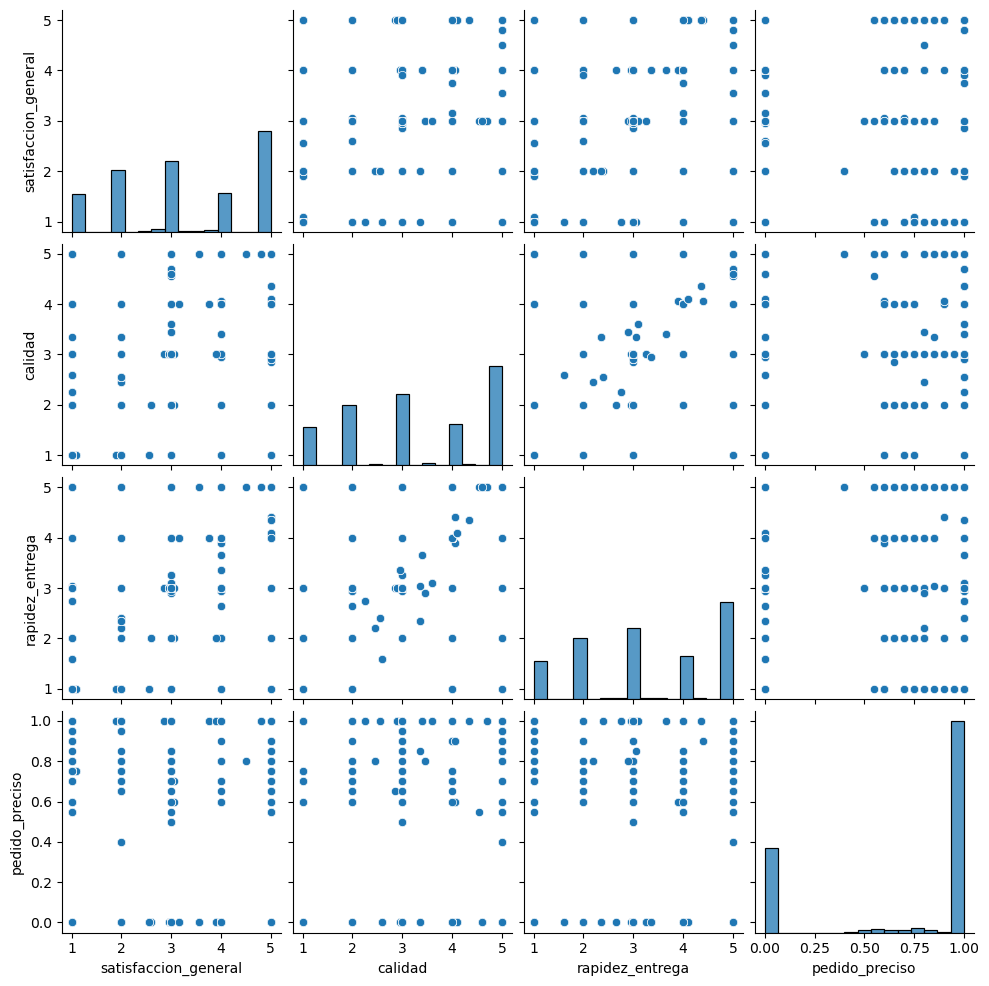

In [70]:
sns.pairplot(df_pca)

## Eigenvectores y eigenvectores:

In [71]:
#eigenvalores:

eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix) 


In [73]:
eigen_values 

array([2.09434897, 0.61130185, 1.00043018, 0.29429583])

In [74]:
eigen_vectors 


array([[ 0.51197453,  0.85875255, -0.01658454,  0.01229169],
       [ 0.60623483, -0.37091122,  0.02985751,  0.70286039],
       [ 0.60844896, -0.35248551,  0.00440876, -0.71100239],
       [ 0.0122996 , -0.02688648, -0.99940685,  0.01765765]])

## Valor propio:
* no se observan variables con valores elevados para llegar a concluir que se hace viable reduccir dimensiones

In [75]:
# cuanto porcentaje es cada valor propio:

variance_explained = [] # vacio
for i in eigen_values:
    variance_explained.append((i/sum(eigen_values))*100) 

print(variance_explained)

[52.35379210194938, 15.281106621697358, 25.008398539177296, 7.356702737175958]


## Se conservan las mismas 4 variables

In [76]:
# aplicacion de PCA:

from sklearn.decomposition import PCA 


pca = PCA(n_components=4) 
pca.fit(scaled) 


PCA(n_components=4)

In [77]:
pca.explained_variance_ratio_

array([0.52353792, 0.25008399, 0.15281107, 0.07356703])

## Visualizacion de los residuos:
* se aprecia que los valores en mayor medida son 1 
* se aprecia que existen algunos residuos atipicos

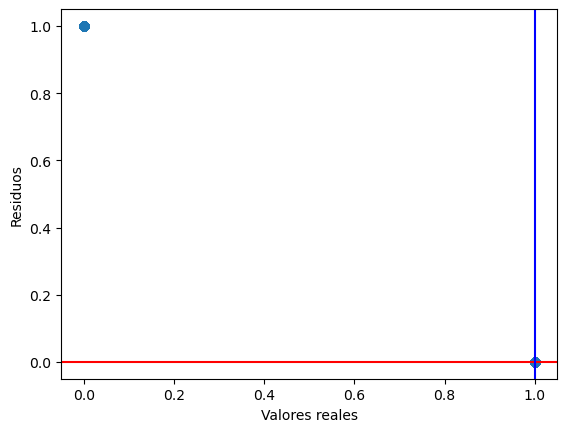

In [78]:
# GRAFICA DE RESIDUOS

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Definir las columnas de características y la variable objetivo
X_cols = ['satisfaccion_general', 'calidad', 'rapidez_entrega']
y_col = 'pedido_preciso'

# Convertir la variable objetivo a valores binarios
y = (df_imputed[y_col] > 0.5).astype(int)

# Seleccionar las características y la variable objetivo
X = df_imputed[X_cols].values

# Definir el modelo de regresión logística
lr = LogisticRegression()

# Ajustar el modelo utilizando los datos de entrenamiento
lr.fit(X, y)

# Hacer predicciones en el conjunto de prueba
y_pred = lr.predict(X)

# Calcular los residuos
residuos = y_pred - y

# Crear el gráfico de residuos
plt.scatter(y, residuos)
plt.axhline(y=0, color='red')
plt.xlabel('Valores reales')
plt.ylabel('Residuos')

# Agregar una línea de color POR DONDE SE ACUMULAN LA MAYOR CATIDAD DE DATOS EN LA GRAFICA
plt.axvline(x=np.median(y), color='blue')
plt.show()


## Residuos en escala logaritmica:

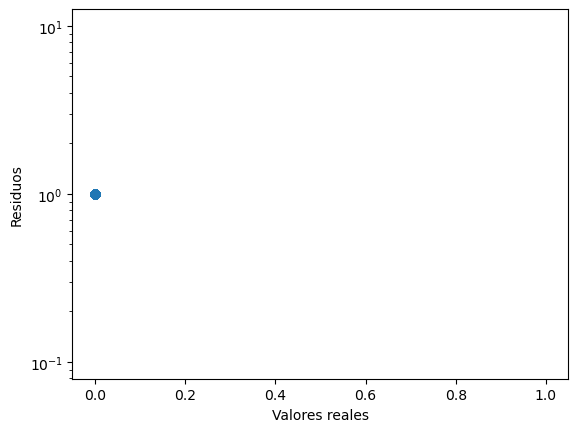

In [79]:
# RESIDUOS CON ESCALA LOGARITMICA

# Definir las columnas de características y la variable objetivo
X_cols = ['satisfaccion_general', 'calidad', 'rapidez_entrega']
y_col = 'pedido_preciso'

# Convertir la variable objetivo a valores binarios
y = (df_imputed[y_col] > 0.5).astype(int)

# Seleccionar las características y la variable objetivo
X = df_imputed[X_cols].values

# Definir el modelo de regresión logística
lr = LogisticRegression()

# Ajustar el modelo utilizando los datos de entrenamiento
lr.fit(X, y)

# Hacer predicciones en el conjunto de prueba
y_pred = lr.predict(X)

# Calcular los residuos
residuos = y_pred - y

# Crear el gráfico de residuos con escala logarítmica
plt.scatter(y, residuos)
plt.yscale('log')
plt.axhline(y=0, color='red')
plt.xlabel('Valores reales')
plt.ylabel('Residuos')
plt.show()

## Técnica de submuestreo y modelo de bosques aleatorios:
* Debido a que en la variable dependiente pedido preciso los valores de cero son pocos en comparación con los valores uno se produce un desbalanceo
* Se aplica el submuestreo para generar una cantidad de datos a escala mas pequeña pero que permitan balancear la cantidad de ceros y unos en la variable dependiente pedido preciso generando la misma cantidad de ceros y unos para la variable en mención
* Se aplica el modelo de bosques aleatorios
* Las métricas obtenidas muestran cierta debilidad del modelo de submuestreo para detectar los ceros para la variable en mención 
* Las métricas indican que el modelo se especializa en mayor medida en detectar los unos de la variable en mención 


In [80]:

# TECNICA DE SUBMESTREO Y AJUSTE DEL MODELO A LOS DATOS ORIGINALES

# importar las librerías necesarias
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, roc_auc_score, cohen_kappa_score, recall_score, accuracy_score, classification_report, confusion_matrix

# Definir las variables independientes (X) y la variable objetivo (y)
X = df_imputed[['satisfaccion_general', 'calidad', 'rapidez_entrega']]
y = (df_imputed['pedido_preciso'] > 0.5).astype(int) # Convertir a 0 o 1

# definir los parámetros del modelo
param_grid = {
 'n_estimators': [5, 10, 15, 20],
 'max_depth': [8, 16, 32, 64],
 'min_samples_split': [2, 5, 10, 15],
 'min_samples_leaf': [1, 2, 4, 6]
}

# dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# submuestreo estratificado
rus = RandomUnderSampler(random_state=0, sampling_strategy={0: 1760, 1: 1760})
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# entrenar el modelo
modelo = RandomForestClassifier(random_state=0)
cv = GridSearchCV(modelo, param_grid=param_grid, cv=18, scoring='accuracy', n_jobs=-1)
cv.fit(X_rus, y_rus)

# Obtén los mejores parámetros
mejores_param = cv.best_params_

# Imprime los mejores parámetros
print(mejores_param)

# obtener el mejor modelo
mejor_modelo = cv.best_estimator_

# Realizar predicciones en el conjunto de test
y_pred = mejor_modelo.predict(X_test)

# calcular las métricas
precision = precision_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = 1 - recall
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# imprimir las métricas
print(f'Precision: {precision:.2f}')
print(f'auc: {auc:.2f}')
print(f'Kapa: {kappa:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)

# ajustar los resultados del modelo submuestreado al conjunto original de datos
y_pred_original = mejor_modelo.predict(X)

# imprimir los resultados ajustados
print(y_pred_original)

# Imprimir el tamaño de la variable y_pred_original
print(len(y_pred_original))

{'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 15}
Precision: 0.77
auc: 0.56
Kapa: 0.09
Recall: 0.52
Specificity: 0.48
Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.59      0.41       583
           1       0.77      0.52      0.62      1541

    accuracy                           0.54      2124
   macro avg       0.54      0.56      0.52      2124
weighted avg       0.65      0.54      0.57      2124

Confusion Matrix:
 [[342 241]
 [734 807]]
[1 1 0 ... 0 0 0]
10616


## Creación de datos sintéticos y aplicación del modelo de bosques aleatorios:
* Se generan una mayor cantidad de datos minoritarios cero para intentar balancear la variable dependiente
* Al aplicar el modelo de bosques aleatorios se generan métricas mas pobres que las obtenidas anteriormente ya que el modelo baja la capacidad para identificar valores 1 y sube un poco la capacidad para identificar ceros


In [81]:

# CREAR DATOS SINTETICOS DE LA POBLACION MINORITARIA
# PASO 1: crear dos conjuntos de datos, uno con los datos originales y otro con los datos submuestreados

# Importar las librerías necesarias
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
# Importar la clase SMOTE
from imblearn.over_sampling import SMOTE # PARA CREAR LOS DATOS SINTETICOS

# Definir los parámetros del modelo
param_grid = {
  'n_estimators': [120, 180, 240, 300],
  'max_depth': [20, 40, 60, 80],
  'min_samples_split': [15, 25, 35, 45],
  'min_samples_leaf': [9, 15, 21, 32]
}

# Obtener los datos originales
X = df_imputed[['satisfaccion_general', 'calidad', 'rapidez_entrega']]
y = (df_imputed['pedido_preciso'] > 0.5).astype(int)  # Convertir a 0 o 1

# Submuestreo estratificado
rus = RandomUnderSampler(random_state=0, sampling_strategy={0: 2800, 1: 2800})# existen como maximo 2949 ceros en la variable dependiente, si supero este valor sale error, en resumen 2949 ceros y 2941 unos para un total de 5898
X_rus, y_rus = rus.fit_resample(X[['satisfaccion_general', 'calidad', 'rapidez_entrega']], (df_imputed['pedido_preciso'] > 0.5).astype(int))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.25)


# PASO 2: método upsample() de la clase SMOTE() para crear datos sintéticos de la clase minoritaria

# Importar la clase SMOTE
from imblearn.over_sampling import SMOTE

# Importar la clase SMOTE
from imblearn.over_sampling import SMOTE

# Crear datos sintéticos de la clase minoritaria
X_synthetic, y_synthetic = SMOTE(k_neighbors=7000).fit_resample(X_rus, y_rus)

#PASO 3: UNIR LOS DATOS SUBMUESTRADOS CON LOS DATOS SINTETICOS

# Unir los datos submuestreados y los datos sintéticos
X = np.vstack([X_rus, X_synthetic])
y = np.hstack([y_rus, y_synthetic])

#PASO 4: utilizar este nuevo conjunto de datos para entrenar el modelo y realizar la predicción de la variable dependiente

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Realizar la búsqueda de hiperparámetros
modelo = RandomForestClassifier(random_state=0)
cv = GridSearchCV(modelo, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
cv.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(cv.best_params_)

# Realizar la predicción
y_pred = cv.predict(X_test)

# METRICAS PARA Y_TEST AND Y_PRED

# Precisión
precision = precision_score(y_test, y_pred)

# Área bajo la curva ROC
auc = roc_auc_score(y_test, y_pred)

# Índice Kappa
kappa = cohen_kappa_score(y_test, y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred)

# Especificidad
specificity = 1 - recall

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'auc: {auc:.2f}')
print(f'Kapa: {kappa:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)


{'max_depth': 20, 'min_samples_leaf': 9, 'min_samples_split': 45, 'n_estimators': 240}
Precision: 0.60
auc: 0.59
Kapa: 0.17
Recall: 0.52
Specificity: 0.48
Accuracy: 0.59
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.65      0.61      1389
           1       0.60      0.52      0.56      1411

    accuracy                           0.59      2800
   macro avg       0.59      0.59      0.58      2800
weighted avg       0.59      0.59      0.58      2800

Confusion Matrix:
 [[899 490]
 [671 740]]


## Regresión logística con datos originales:
* Se obtiene un modelo bueno para identificar los valores 1 de la variable dependiente según las métricas 
* No es un modelo aceptable para detectar valores cero de la variable dependiente según las métricas


In [83]:
# REGRESION LOGISTICA CON HIPERPARAMETROS

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_auc_score, cohen_kappa_score
from sklearn.metrics import recall_score


# Definir las variables independientes (X) y la variable objetivo (y)
X = df_imputed[['satisfaccion_general', 'calidad', 'rapidez_entrega']]
y = (df_imputed['pedido_preciso'] > 0.5).astype(int)  # Convertir a 0 o 1


# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Escalar las características para mejorar la convergencia del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de regresión logística
logistic_regression = LogisticRegression()

# Definir la cuadrícula de hiperparámetros a ajustar
param_grid = {'C': [0.0001, 0.01, 0.1, 1, 10, 100]} 

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(logistic_regression, param_grid, cv=10, n_jobs=-1)

# Ajustar el modelo utilizando la búsqueda de cuadrícula
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros
best_params = grid_search.best_params_

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", best_params)

# Hacer predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test_scaled)

# METRICAS

# Precisión
precision = precision_score(y_test, y_pred)



# Área bajo la curva ROC
auc = roc_auc_score(y_test, y_pred)

# Índice Kappa
kappa = cohen_kappa_score(y_test, y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred)

# Especificidad
specificity = 1 - recall

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'auc: {auc:.2f}')
print(f'Kapa: {kappa:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)


Mejores hiperparámetros: {'C': 0.0001}
Precision: 0.72
auc: 0.50
Kapa: 0.00
Recall: 1.00
Specificity: 0.00
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2068
           1       0.72      1.00      0.84      5364

    accuracy                           0.72      7432
   macro avg       0.36      0.50      0.42      7432
weighted avg       0.52      0.72      0.61      7432

Confusion Matrix:
 [[   0 2068]
 [   0 5364]]


C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## se observa un valor adecuado de validacion cruzada:

In [85]:
# validacion cruzada

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Definir las columnas de características y la variable objetivo
X_cols = ['satisfaccion_general', 'calidad', 'rapidez_entrega']
y_col = 'pedido_preciso'

# Convertir la variable objetivo a valores binarios
y = (df_imputed[y_col] > 0.5).astype(int)

# Seleccionar las características y la variable objetivo
X = df_imputed[X_cols].values

# Definir el modelo de regresión logística
lr = LogisticRegression()

# Definir los parámetros de la validación cruzada
cv = 5
scoring = 'accuracy'

# Realizar la validación cruzada
scores = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring=scoring)

# Imprimir los resultados de la validación cruzada
print('Precisión promedio:', np.mean(scores))


Precisión promedio: 0.7233040095573788


## Arboles de decisión con datos originales:
* Se obtiene un buen modelo para identificar los valores cero de la variable dependiente según las métricas 
* El modelo no es tan adecuado para identificar los valores 1 de la variable dependiente según las métricas 


In [87]:
# arboles de desicion

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_auc_score, cohen_kappa_score, recall_score


# Definir las variables independientes (X) y la variable objetivo (y)
X = df_imputed[['satisfaccion_general', 'calidad', 'rapidez_entrega']]
y = (df_imputed['pedido_preciso'] > 0.5).astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para mejorar la convergencia del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de árboles de decisión
decision_tree = DecisionTreeClassifier(max_depth=20, random_state=42)

# fit
decision_tree.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = decision_tree.predict(X_test_scaled)

# METRICAS
# Precisión
precision = precision_score(y_test, y_pred)

# Área bajo la curva ROC
auc = roc_auc_score(y_test, y_pred)

# Índice Kappa
kappa = cohen_kappa_score(y_test, y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred)

# Especificidad
specificity = 1 - recall

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'auc: {auc:.2f}')
print(f'Kapa: {kappa:.2f}')

Precision: 0.74
auc: 0.53
Kapa: 0.09


## Máquinas de soporte con datos originales:
* Se obtiene un buen modelo para identificar los valores cero de la variable dependiente según las métricas 
* El modelo no es adecuado para identificar los valores 1 de la variable dependiente según las métricas 


In [88]:
#modelo maquinas de sopote

from sklearn.svm import SVC

svm = SVC()

# Definir la cuadrícula de hiperparámetros a ajustar:

param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],  
    'C': [0.0001, 0.001, 0.01],
    'gamma': ['scale', 'auto'],  
}

# Configurar la búsqueda de cuadrícula con validación cruzada:

grid_search = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1)

# Ajustar el modelo utilizando la búsqueda de cuadrícula:

grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros:

best_params = grid_search.best_params_

# Imprimir los mejores hiperparámetros:
print("Mejores hiperparámetros:", best_params)

# Hacer predicciones en el conjunto de prueba:

y_pred = grid_search.predict(X_test_scaled)
 
# Evaluar el rendimiento del modelo:

precision = precision_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = 1 - recall
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'auc: {auc:.2f}')
print(f'Kapa: {kappa:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)


Mejores hiperparámetros: {'C': 0.0001, 'gamma': 'scale', 'kernel': 'linear'}
Precision: 0.72
auc: 0.50
Kapa: 0.00
Recall: 1.00
Specificity: 0.00
Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       586
           1       0.72      1.00      0.84      1538

    accuracy                           0.72      2124
   macro avg       0.36      0.50      0.42      2124
weighted avg       0.52      0.72      0.61      2124

Confusion Matrix:
 [[   0  586]
 [   0 1538]]


C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Windows\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Bosques aleatorios con datos originales 1:
* Según las métricas se observa una mejora con respecto a los modelos anteriores para identificar los valores 1 y 0 de la variable independiente siendo fuerte el modelo para identificar los valores 0


In [94]:
# hiperparametros random forest

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Definir las variables independientes (X) y la variable objetivo (y)
X = df_imputed[['satisfaccion_general', 'calidad', 'rapidez_entrega']]
y = (df_imputed['pedido_preciso'] > 0.5).astype(int)

# Definir una cuadrícula de hiperparámetros para ajustar
param_grid = {
    'n_estimators': [300, 600, 1000],
    'max_depth': [90, 120, 180],
    'min_samples_leaf': [10, 15, 20],
}

# Importar el modelo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Configurar la búsqueda de cuadrícula con validación cruzada
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=10, scoring='accuracy', n_jobs=-1)
# Ajustar el modelo y buscar los mejores hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# Imprimir los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

# Obtener el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_

# Hacer predicciones en el conjunto de prueba con el modelo mejorado
y_pred = best_model.predict(X_test_scaled)

# Evaluar el rendimiento del modelo mejorado
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)

Mejores hiperparámetros: {'max_depth': 90, 'min_samples_leaf': 10, 'n_estimators': 600}
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.05      0.10       586
           1       0.73      1.00      0.85      1538

    accuracy                           0.74      2124
   macro avg       0.87      0.53      0.47      2124
weighted avg       0.81      0.74      0.64      2124

Confusion Matrix:
 [[  31  555]
 [   0 1538]]


## Bosques aleatorios con datos originales 2:
* Este modelo es el mejor de todos pudiendo identificar de manera correcta los valores 1 de la variable dependiente y con moderada eficiencia los valores cero


In [95]:
# bosques aleatorios

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_auc_score, cohen_kappa_score, recall_score


# Definir las variables independientes (X) y la variable objetivo (y)
X = df_imputed[['satisfaccion_general', 'calidad', 'rapidez_entrega']]
y = (df_imputed['pedido_preciso'] > 0.5).astype(int)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características para mejorar la convergencia del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir el modelo de bosques aleatorios
random_forest = RandomForestClassifier(n_estimators=90000, max_depth=25, random_state=42, n_jobs=-1)

# fit
random_forest.fit(X_train_scaled, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = random_forest.predict(X_test_scaled)

# METRICAS
# Precisión
precision = precision_score(y_test, y_pred)

# Área bajo la curva ROC
auc = roc_auc_score(y_test, y_pred)

# Índice Kappa
kappa = cohen_kappa_score(y_test, y_pred)

# Calcular el recall
recall = recall_score(y_test, y_pred)

# Especificidad
specificity = 1 - recall

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'auc: {auc:.2f}')
print(f'Kapa: {kappa:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_rep)
print('Confusion Matrix:\n', conf_matrix)

Precision: 0.74
auc: 0.53
Kapa: 0.09
Recall: 1.00
Specificity: 0.00
Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.12       586
           1       0.74      1.00      0.85      1538

    accuracy                           0.74      2124
   macro avg       0.87      0.53      0.49      2124
weighted avg       0.81      0.74      0.65      2124

Confusion Matrix:
 [[  38  548]
 [   0 1538]]


## Ajuste del modelo anterior a los datos reales del dataframe:

In [97]:
# ajuste del modelo a datos originales


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_auc_score, cohen_kappa_score, recall_score


# Definir las variables independientes (X) y la variable objetivo (y)
X = df_imputed[['satisfaccion_general', 'calidad', 'rapidez_entrega']]
y = (df_imputed['pedido_preciso'] > 0.5).astype(int)

# Ajustar el modelo de bosques aleatorios con paralelización
random_forest = RandomForestClassifier(n_estimators=90000, max_depth=25, random_state=42)

# ajustar a datos originales
random_forest.fit(X, y)


# Hacer predicciones en el DataFrame original
y_pred = random_forest.predict(df_imputed[['satisfaccion_general', 'calidad', 'rapidez_entrega']]) 

# Agregar la columna de predicciones al DataFrame original
df_imputed['pedido_preciso_pred'] = y_pred

# Ahora puedes acceder a las predicciones en la columna 'pedido_preciso_pred' de tu DataFrame df_imputed

# Comparar las variables
comparacion = pd.DataFrame(
    {
        'Valor original': (df_imputed['pedido_preciso'] > 0.5).astype(int),
        'Valor predicho': y_pred,
    },
    index=df_imputed.index,
)

# Imprimir la comparación
print(comparacion)

# Evaluar el rendimiento del modelo
precision = precision_score(y, y_pred)
auc = roc_auc_score(y, y_pred)
kappa = cohen_kappa_score(y, y_pred)
recall = recall_score(y, y_pred)
specificity = 1 - recall
accuracy = accuracy_score(y, y_pred)
classification_rep = classification_report(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)

print(f"Precision: {precision:.2f}")
print(f"auc: {auc:.2f}")
print(f"Kapa: {kappa:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)


       Valor original  Valor predicho
0                   1               1
1                   1               1
2                   1               1
3                   1               1
4                   1               1
5                   1               1
6                   1               1
7                   0               1
8                   1               1
9                   0               1
10                  1               1
11                  1               1
12                  0               1
13                  1               1
14                  1               1
15                  1               1
16                  1               1
17                  0               1
18                  1               1
19                  1               1
20                  1               1
21                  0               1
22                  1               1
23                  1               1
24                  1               1
25          

## CONCLUSIONES:

* De acuerdo a la implementación de los modelos para clasificar los valores de la variable dependiente “pedido preciso” el mejor modelo alcanzado fue el de bosques aleatorios con datos originales 2 ya que mejoro la identificación de los valores cero para la variable dependiente lo que hizo falta en los modelos anteriormente analizados
